<a href="https://colab.research.google.com/github/ewst22ParkSY/ESAA11_YB/blob/ESAA11_YB/ESAA_YB_WEEK11_2_transcript.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 평균 이동

#### 평균 이동(Mean Shift)의 개요
- K-평균과 유사하게 중심을 군집의 중심으로 지속적으로 움직이면서 군집화를 수행.
  - K-평균: 중심에 소속된 데이터의 평균 거리를 중심으로 이동
  - 평균 이동: 중심을 데이터가 모여 있는 밀도가 가장 높은 곳으로 이동
- 데이터의 분포도를 이용해 군집 중심점(데이터 포인트가 모여있는 곳이라는 생각에서 착안)으로 찾음. > 확률 밀도 함수 이용.
- 가장 집중적으로 데이터가 모여있어 확률 밀도 함수가 피크인 점을 군집 중심점으로 선정.
> 일반적으로 주어진 모델의 확률 밀도를 찾기 위해 KDE(Kernel Density Estimation) 이용.

**평균 이동 군집화**
- 특정 데이터를 반경 내의 데이터 분포 확률 밀도가 가장 높은 곳으로 이동하기 위해 주변 데이터와의 거리 값을 KDE 함수 값으로 입력, 반환 값을 현재 위치에서 업데이터하면서 이동하는 방식을 취함.
- 전체 데이터에 반복적으로 적용하여 데이터의 군집 중심점을 찾아냄

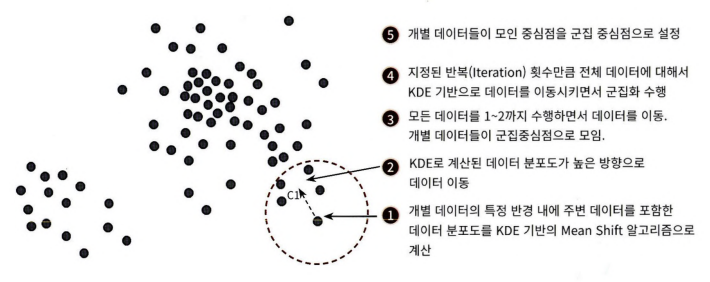

KDE(Kernel Density Estimation)
- 커널 함수를 통해 어떤 변수의 확률 밀도 함수를 추정하는 대표적인 방법
- 관측된 데이터 각각에 커널 함수를 적용한 값을 모두 더한 뒤 데이터 건수로 나눠 확률 밀도 함수 측정
  - 확률 밀도 함수 PDF: 확률 변수의 분포를 나타내는 함수
- 대표적인 커널 함수: 가우시안 분포 함수

KDE 진행 시각화

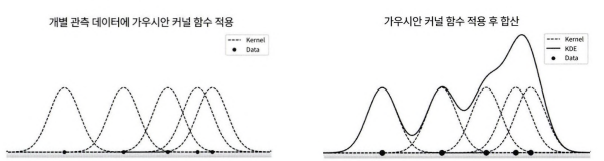


KDE 커널 함수식   
$
KDE = \frac{1}{n}\sum_{i=1}^{n}K_h(x-x_i) = \frac{1}{nh}\sum_{i=1}^{n}K(\frac{x-x_i}{h})
$

- 대역폭 h: KDE 형태를 부드러운(또는 뾰족한) 형태로 평활화(Smoothing)하는 데 적용
  - 작은 h값(h=1.0): 좁고 뾰족한 KDE는 과적합하기 쉬움
  - 매우큰 h값(h=10): 과도하게 평활화된 KDE로 인해 지나치게 단순화된 방식으로 확률 밀도 함수를 추정해 과소적합하기 쉬움.
  > 적절한 KDE 대역폭 계산하는 것이 KDE 기반의 평균 이동 군집화에서 매우 중요! <br>
- 대역폭이 클수록 평활화된 KDE로 인해 적은 수의 군집 중심점을 가지며 대역폭이 적을수록 많은 수의 군집 중심점을 가짐.
- 평균 이동 군집화는 군집의 개수를 지정하지 않으며 오직 대역폭의 크기에 따라 군집화를 수행

MeanShift를 제공.<br>
- 중요 초기화 파라미터 bandwidth: KDE의 대역폭 h와 동일
- 대역폭 계산을 위해 estimate_bandwidth()함수 제공



In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.7, random_state=0)

meanshift = MeanShift(bandwidth=0.8)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2 3 4 5]


In [2]:
meanshift = MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


In [3]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X)
print('bandwidth 값;', round(bandwidth,3))

bandwidth 값; 1.816


In [4]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1','ftr2'])
clusterDF['target']=y

# estimate_bandwidth()로 최적의 bandwidth 계산
best_bandwidth = estimate_bandwidth(X)

meanshift = MeanShift(bandwidth = best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


<ipython-input-5-8ec47d79da0d>:20: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x = center_x_y[0], y=center_x_y[1], s=70, color='k',edgecolor='k',


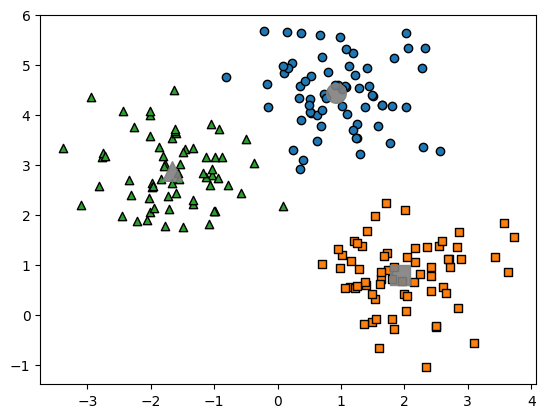

In [5]:
#군집 시각화

import matplotlib.pyplot as plt
%matplotlib inline

clusterDF['meanshift_label'] = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o','s','^','x','*']

for label in unique_labels:
  label_cluster = clusterDF[clusterDF['meanshift_label']==label]
  center_x_y = centers[label]
  # 군집별로 다른 마커로 산점도 적용
  plt.scatter(x = label_cluster['ftr1'], y = label_cluster['ftr2'], edgecolor='k', marker=markers[label])

  # 군집별 중심 표현
  plt.scatter(x = center_x_y[0], y=center_x_y[1], s=200, color='gray',
              alpha=0.9, marker=markers[label])
  plt.scatter(x = center_x_y[0], y=center_x_y[1], s=70, color='k',edgecolor='k',
              marker='' %label)

plt.show()

In [6]:
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: count, dtype: int64


평균 이동의 장점
- 데이터 세트를 특정 형태 가정하지 않고, 특정 분포도 기반의 모델로 가정하지 않아 좀 더 유연한 군집화 가능
- 이상치의 영향력 크지 않음
- 미리 군집의 개수를 정할 필요 없음

단점
- 알고리즘 수행 시간이 오래 걸림
- bandwidth의 크기에 따른 군집화 영향도가 매우 큼

> 평균 이동 군집화 기법은 분석 업무 기반의 데이터 세트보다는 컴퓨터 비전 영역에서 더 많이 사용.

### GMM(Gaussian Mixture Model)
- 군집화를 적용하고자 하는 데이터가 여러 개의 가우시안 분포를 가진 데이터 집합들이 섞여서 생성된 것이라는 가정하에 군집화를 수행하는 방식
- 가우시안 분포 = 정규분포
- GMM은 데이터를 여러 개의 가우시안 분포가 섞인 것으로 간주
- 서로 다른 정규 분포에 기반해 군집화를 수행하는 것

모수 추정
- 개별 정규 분포의 평균과 분산
- 각 데이터가 어떤 정규 분포에 해당되는지의 확률

GMM은 EM(Expectation and Maximization) 방법 적용

#### GMM을 이용한 붓꽃 데이터 세트 군집화

GMM - 확률 기반 군집화
K-평균 - 거리 기반 군집화

In [7]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']

# 편리한 데이터 핸들링을 위해 DaraFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target

GaussianMixture의 가장 중요한 초기화 파라미터
- n_components: gaussian mixture의 모델의 총 개수 ( = K-평균의 n_clusters와 같이 군집의 개수를 정하는 데 중요한 역할 수행)

In [8]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=0).fit(iris.data)
gmm_cluster_labels = gmm.predict(iris.data)

# 군집화 결과를 irisDF의 'gmm_cluster' 칼럼명으로 저장
irisDF['gmm_cluster']=gmm_cluster_labels
irisDF['target'] = iris.target

# target값에 따라 gmm_cluster 값이 어떻게 매핑됐는지 확인.
iris_result = irisDF.groupby(['target'])['gmm_cluster'].value_counts()
print(iris_result)

target  gmm_cluster
0       1              50
1       0              45
        2               5
2       2              50
Name: count, dtype: int64


In [9]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(iris.data)
kmeans_cluster_labels = kmeans.predict(iris.data)
irisDF['kmeans_cluster'] = kmeans_cluster_labels
iris_result = irisDF.groupby(['target'])['kmeans_cluster'].value_counts()
print(iris_result)

target  kmeans_cluster
0       1                 50
1       0                 47
        2                  3
2       2                 36
        0                 14
Name: count, dtype: int64


### 평균의 비교

KMeans: 원형의 범위에서 군집화 수행. (데이터 세트가 원형의 범위를 가질수록 KMeans의 군집화 효율은 더욱 높아짐)

군집을 자주 시각화하므로 별도의 함수 만들어 이용하기

```python
visualize_cluster_plot(clsterobj, dataframe, label_name, iscluster=True)
```

In [10]:
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_

    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)

        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)

        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'

    plt.legend(loc=legend_loc)
    plt.show()

입력 받는 인자값

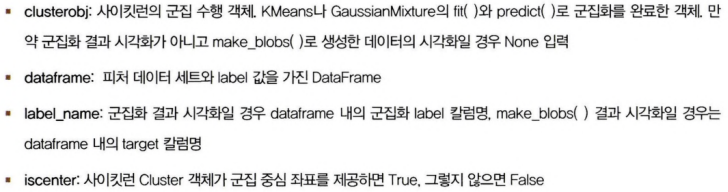

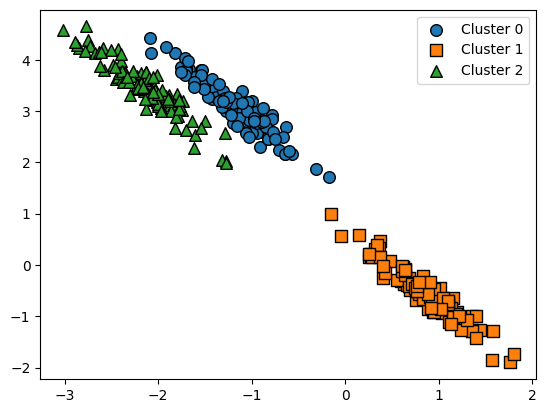

In [11]:
from sklearn.datasets import make_blobs

# make_blobs()로 300개의 데이터 세트, 3개의 군집 세트, cluster_std = 0.5를 만듦.
X, y  = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.5, random_state=0)

# 길게 늘어난 타원형의 데이터 세트를 생성하기 위해 변환함.
transformation = [[0.60834549, -0.63667341],[-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)

# feature 데이터 세트와 make_blobs()의 y 결괏값을 DataFrame으로 저장
clusterDF = pd.DataFrame(data=X_aniso, columns=['ftr1','ftr2'])
clusterDF['target'] = y

# 생성된 데이터 세트를 target 별로 다른 마커로 표시해 시각화 함
visualize_cluster_plot(None, clusterDF, 'target',iscenter=False)

<ipython-input-10-f4c266540d94>:24: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\


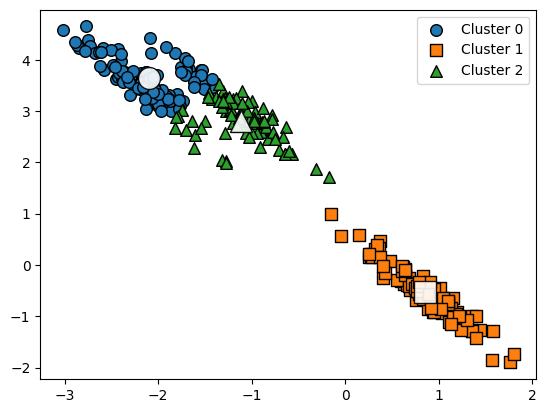

In [12]:
# 3개의 군집 기반 Kmeans를 X_aniso 데이터 세트에 적용
kmeans = KMeans(3, random_state=0)
kmeans_label = kmeans.fit_predict(X_aniso)
clusterDF['kmeans_label'] = kmeans_label

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_label', iscenter=True)

길쭉한 방향으로 데이터가 밀집해 있을 경우 최적의 군집화가 어려움.

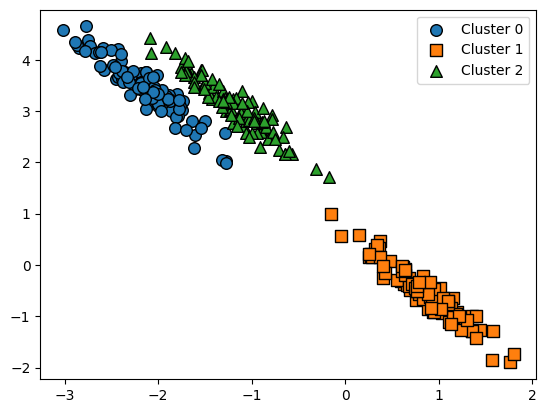

In [13]:
# 3개의 n_components 기반 GMM을 X_aniso 데이터 세트에 적용
gmm = GaussianMixture(n_components=3, random_state=0)
gmm_label = gmm.fit(X_aniso).predict(X_aniso)
clusterDF['gmm_label'] = gmm_label

# GaussianMixture는 cluster_centers_ 속성이 없으므로 iscenter를 False로 설정.
visualize_cluster_plot(gmm, clusterDF, 'gmm_label', iscenter=False)

In [14]:
# make_blobs()의 타겟값과 KMeans, GMM의 군집 label비교해 군집화 효율 차이 발생 확인
print('### KMeans Clustering ###')
print(clusterDF.groupby('target')['kmeans_label'].value_counts())
print('\n### Gaussian Mixture Clustering ###')
print(clusterDF.groupby('target')['gmm_label'].value_counts())

### KMeans Clustering ###
target  kmeans_label
0       2                73
        0                27
1       1               100
2       0                86
        2                14
Name: count, dtype: int64

### Gaussian Mixture Clustering ###
target  gmm_label
0       2            100
1       1            100
2       0            100
Name: count, dtype: int64


GMM은 KMeans보다 유연하게 다양한 데이터 세트에 잘 적용될 수 있지만 군집화를 위한 수행 시간이 오래 걸림!